In [4]:
# Import libraries
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# 📥 Load Iris dataset
iris = load_iris()

# Convert to pandas DataFrame for easier manipulation
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target




In [15]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# Introduce some missing values for demonstration
X.iloc[0, 0] = np.nan
X.iloc[10, 2] = np.nan
X.iloc[30, 3] = np.nan

# Check how many missing values are present
X.isnull().sum()


sepal length (cm)    1
sepal width (cm)     0
petal length (cm)    1
petal width (cm)     1
dtype: int64

In [8]:
# Fill missing values using column mean
X.fillna(X.mean(), inplace=True)

# Verify there are no missing values now
X.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [9]:
# Fill missing values using column mean
X.fillna(X.mean(), inplace=True)

# Verify there are no missing values now
X.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
X_scaled_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-2.158257e-15,1.019004,-1.356357,-1.33203
1,-1.152203e+00,-0.131979,-1.356357,-1.33203
2,-1.395201e+00,0.328414,-1.413512,-1.33203
3,-1.516700e+00,0.098217,-1.299203,-1.33203
4,-1.030704e+00,1.249201,-1.356357,-1.33203


In [13]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (120, 4), Test shape: (30, 4)


In [17]:
# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [18]:
# Make predictions
y_pred = model.predict(X_test)

# 🧾 Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.2f}\n")
print("📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


✅ Accuracy: 0.93

📄 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



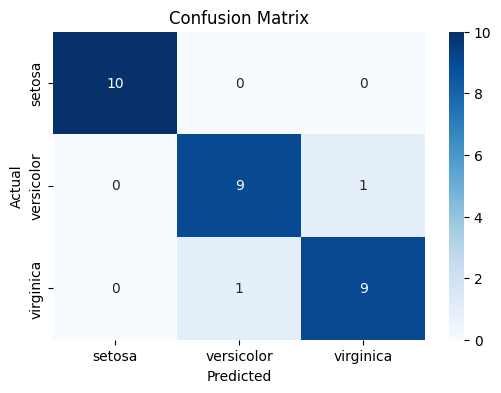

In [19]:
# 🔍 Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
# 💾 Save model and scaler
os.makedirs("app", exist_ok=True)
joblib.dump(model, "app/model.pkl")
joblib.dump(scaler, "app/scaler.pkl")

print("🎉 Model and scaler saved successfully in 'app/' folder.")


🎉 Model and scaler saved successfully in 'app/' folder.


In [21]:
import joblib

joblib.dump(model, "../app/model.pkl")
joblib.dump(scaler, "../app/scaler.pkl")


['../app/scaler.pkl']